In [25]:
import tensorflow as tf

In [26]:
(x_train,y_train),(x_test,y_test) =tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113 )

In [27]:
# (x_train,y_train),(x_test,y_test) =

In [28]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [29]:
import pandas as pd
df=pd.DataFrame(x_train)
df['Target']=y_train
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [50]:
# Step 2 standard Scaler for scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [31]:
x_train_scaler[0].shape

(13,)

In [32]:
# Step 3 NN Architecture

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=x_train_scaler[0].shape))
model.add(tf.keras.layers.Dense(1))

In [33]:
# For first hidden layer

#No of weights

w_h=13*8
b_h=8
t_h=w_h+b_h
t_h

112

In [34]:
# For output layer

w_o=1*8
b_o=1
t_o=w_o+b_o
t_o

9

In [35]:
# Total Parameters

t_h+t_o

121

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='adam')

In [78]:
history=model.fit(x_train_scaler,y_train,epochs=500,validation_split=0.5,verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 32ms/step - loss: 3.0852 - val_loss: 11.6921
Epoch 2/500
7/7 [==============================] - 0s 15ms/step - loss: 3.0886 - val_loss: 11.6777
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 3.0889 - val_loss: 11.6695
Epoch 4/500
7/7 [==============================] - 0s 16ms/step - loss: 3.0851 - val_loss: 11.6153
Epoch 5/500
7/7 [==============================] - 0s 22ms/step - loss: 3.0875 - val_loss: 11.5858
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 3.0799 - val_loss: 11.6108
Epoch 7/500
7/7 [==============================] - 0s 23ms/step - loss: 3.0797 - val_loss: 11.6538
Epoch 8/500
7/7 [==============================] - 0s 18ms/step - loss: 3.0824 - val_loss: 11.6949
Epoch 9/500
7/7 [==============================] - 0s 15ms/step - loss: 3.0870 - val_loss: 11.7156
Epoch 10/500
7/7 [==============================] - 0s 16ms/step - loss: 3.0818 - val_loss: 11.7330
Epoch 11/

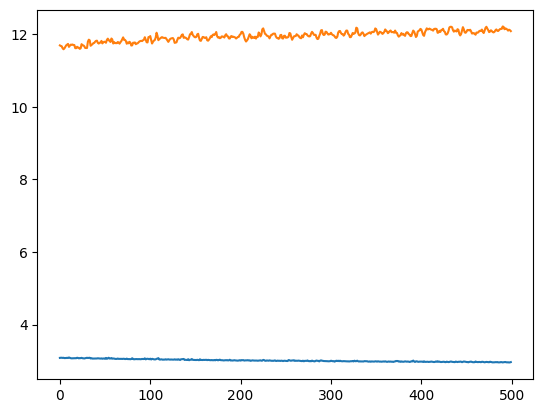

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [80]:
y_pred=model.predict(x_test_scaler)
y_pred.flatten()

4/4 [==============================] - 0s 4ms/step


array([-33.95437  , -45.78562  , -44.39627  ,   6.437663 , -38.441673 ,
       -44.21983  , -30.548027 , -36.933723 , -44.796967 , -36.788986 ,
       -39.33313  , -45.106945 , -40.858643 , -18.42279  , -46.502914 ,
       -38.490143 , -32.610855 , -38.81862  , -41.835182 ,  38.661095 ,
       -53.15367  , -45.42795  , -44.945854 , -46.296143 , -39.455147 ,
       -39.521824 ,  -3.2603693, -29.618195 , -34.82416  , -39.826263 ,
       -41.59993  , -31.664597 ,  -6.00908  , -34.892883 , -47.491272 ,
       -31.816563 ,  25.187943 , -42.375034 , -42.983624 , -31.616898 ,
       -25.895554 , -31.68454  , -20.184961 , -20.212578 , -34.253326 ,
       -40.748116 , -33.36361  , -48.504074 , -18.233755 , -39.53058  ,
       -22.462708 , -42.1605   , -31.861103 , -49.46863  , -23.16948  ,
       -31.948349 , -29.359392 ,  -7.0584955,  -6.1585245, -35.81604  ,
       -27.029934 , -27.907661 , -30.597553 , -42.821083 , -37.472168 ,
       -36.10727  , -18.969452 , -34.710297 , -58.033356 , -30.8

In [81]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [83]:
model.evaluate(x_test_scaler,y_test)

4/4 [==============================] - 0s 8ms/step - loss: 3117.9050


3117.905029296875

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3117.9049060454554

In [86]:
x_test_scaler[0]

array([-0.23744154, -0.50398828, -1.48115445, -1.32279581,  4.10613375,
       -8.50832293, -2.43316853, -2.30805296, -0.89377027, -2.43327233,
       -8.05017099, -3.81157809, -1.44776868])

In [88]:
model.predict(x_test_scaler[0].reshape(-1,13))

1/1 [==============================] - 0s 48ms/step


array([[-33.954372]], dtype=float32)

In [89]:
tf.keras.models.save_model(model,'output.h5')

<ipython-input-89-94f93fb7e696>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'output.h5')


In [91]:

new_model = tf.keras.models.load_model('output.h5')
new_model.predict(x_test_scaler[0].reshape(-1,13))

1/1 [==============================] - 0s 265ms/step


array([[-33.954372]], dtype=float32)

In [92]:
model.layers[1].get_weights()

[array([[ 1.2727035],
        [-2.1857395],
        [ 2.9262288],
        [ 1.3417273],
        [ 1.8294603],
        [ 2.3436573],
        [-3.4326136],
        [ 1.7458867]], dtype=float32),
 array([0.7961722], dtype=float32)]